# Neurons and Neural Networks
![title](title.jpg)

## This is a general structure of a biological neuron cell

![Neuron](neuron-diagram.jpg)

## This is the concept of operation - input, processing, output

![Operation](activation-functions.jpg)

## How activity looks like

![Activity](live_neuron_stages.png)

## Artificial neuron

![perceptron](Single-Neuron-Activation.svg)

### $$Y = f(b+ \sum_i{x_i \cdot w_i})$$

### Flow

1. summ up all the inputs with their respective weights
2. add bias
3. apply activation function to determine output

### Activation functions (tiny subset)

![Activation Functions](activation_functions.png)

## What can a single neuron do?

Turns out, quite a bit! (no pun intended)

### ✅ Boolean functions:

For example - AND gate

![AND](and_gate.png)


### ✅ Classifying linearly separable groups

![classfier](pla2.png)

## Single neuron limitations

### ❌ Non linear classification

![Non linear](linsep_new.png)

### ❌ XOR function 

![xor](bitwise_datasets.png)


### To solve the non linear problems we need to go beyond a single neuron


## Neural Network

interconnected layers of neurons that send signals from one to another

![ann](ann.png)

$$ Neural Network$$

## Signal flow in a neural network

### Bilogical

![Flow](signal_flow.png)

### Artificial
![Topology](topology.jpg)

### Side by side 

![network](network.png)


# LEARNING & INFERENCE

## INFERENCE - Feed Forward

What we have seen about single neuron can be applied to a network. 

Imagine that each layer stands on its own, and output of each prior layer serves as input to the next layer:

so let's say we have three inputs for layer one: $X_{L1}=(x_1, x_2, x_3) $

weights:$W_{L1}=(w_1, w_2, w_3) $ 

bias: $b_1$

activation: $tanh$

outputs: $y = tanh( X_{L1} \cdot W_{L1} + b_1) $

$ y = tanh(x_1 * w_1 + x_2 * w_2 + x_3 * w_3 + b_1) $


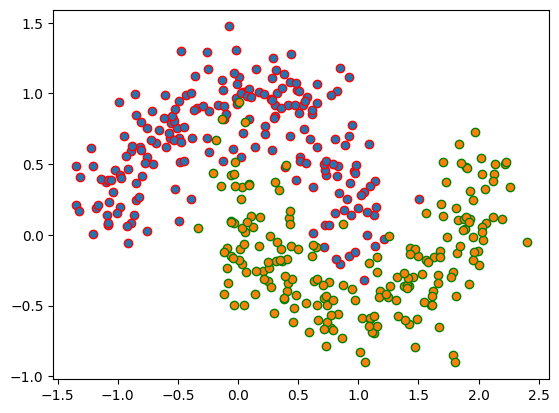

In [220]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline
#
# Generate a dataset and plot it
#
np.random.seed(0)
X, y = datasets.make_moons(400, noise=0.20)
plt.scatter(X[y==0,0],X[y==0,1],edgecolors='r')
plt.scatter(X[y==1,0],X[y==1,1],edgecolors='g')

In [225]:
#
# Neural network architecture
# No of nodes in input layer = 2
# No of nodes in output layer = 2
# No of nodes in the hidden layer = 6
#
input_dim = 2 # input layer dimensionality
output_dim = 1 # output layer dimensionality
hidden_dim = 6 # hidden layer dimensionality
#
# Weights and bias element for layer 1
# These weights are applied for calculating
# weighted sum arriving at neurons in 1st hidden layer
#
W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
#
# Weights and bias element for layer 2
# These weights are applied for calculating
# weighted sum arriving at neurons in 2nd hidden layer
#
W2 = np.random.randn(hidden_dim, hidden_dim)
b2 = np.zeros((1, hidden_dim))
#
# Weights and bias element for layer 2
# These weights are applied for calculating
# weighted sum arriving at in the final / output layer
#
W3 = np.random.randn(hidden_dim, output_dim)
b3 = np.zeros((1, output_dim))

# Quick Reminder about functions:

* "dot" - $X \cdot Y = x_1 * y_1 + x_2 * y_2 +....$

* "sigmoid" - $\frac{1}{1+e^{-x}}$

* "softmax" - activation function, assuming n classes and outputs $y_1, y_2, ..., y_n$, 
$softmax_i = \frac{e^{y_i}}{\sum_{j=1}^{n} {e^{y_j}}} $


In [226]:
def sigmoid(x):
    # compute and return the sigmoid activation value for a
    # given input value
    return 1.0 / (1 + np.exp(-x))
def feed_forward(X, W1, W2, W3, b1, b2, b3):
    #
    # Forward propagation of input signals
    # to 6 neurons in first hidden layer
    # activation is calculated based tanh function
    #
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    #
    # Forward propagation of activation signals from first hidden layer
    # to 6 neurons in second hidden layer
    # activation is calculated based tanh function
    #
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)
    #
    # Forward propagation of activation signals from second hidden layer
    # to 3 neurons in output layer
    #
    z3 = a2.dot(W3) + b3
    #
    # Probability is calculated as an output
    # of softmax function
    # 
    return np.exp(z3) / np.sum(np.exp(z3), axis=1, keepdims=True)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [228]:
probs = feed_forward(X, W1, W2, W3, b1, b2 ,b3)
classes = np.zeros(probs.shape[0], dtype=int)
classes[probs>=0.5] = 1

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

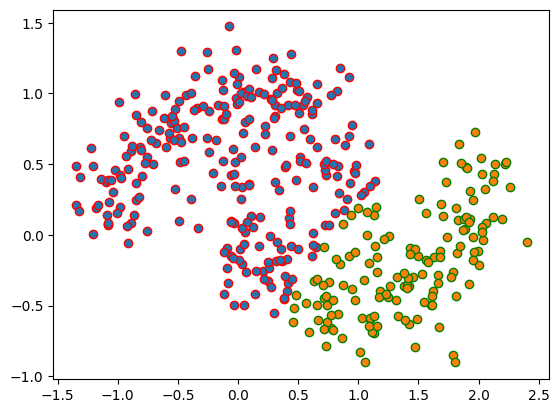

In [215]:
plt.scatter(X[classes==0,0],X[classes==0,1],edgecolors='r')
plt.scatter(X[classes==1,0],X[classes==1,1],edgecolors='g')

In [222]:
from sklearn.neural_network import MLPClassifier

cls = MLPClassifier(hidden_layer_sizes=(6,6),activation='logistic', solver='lbfgs',learning_rate_init=0.015, verbose=True, max_iter=1000, random_state=1)
cls.fit(X, y)
pred_classes = cls.predict(X)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           67     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01049D-01    |proj g|=  6.50570D-02

At iterate    1    f=  6.91859D-01    |proj g|=  4.94760D-03

At iterate    2    f=  6.90285D-01    |proj g|=  1.22769D-02

At iterate    3    f=  6.81529D-01    |proj g|=  4.43522D-02

At iterate    4    f=  6.62155D-01    |proj g|=  1.60378D-01

At iterate    5    f=  5.84721D-01    |proj g|=  7.79789D-02

At iterate    6    f=  5.42183D-01    |proj g|=  6.48943D-02

At iterate    7    f=  4.43339D-01    |proj g|=  6.12759D-02

At iterate    8    f=  3.95729D-01    |proj g|=  2.63807D-02

At iterate    9    f=  3.74922D-01    |proj g|=  4.12156D-02

At iterate   10    f=  3.55072D-01    |proj g|=  5.35704D-02

At iterate   11    f=  3.25380D-01    |proj g|=  3.31932D-02

At iterate   12    f=  3.12982D-01    |proj g|=  1.03388D-02

At iterate   13    f=  3.1

 This problem is unconstrained.
/opt/homebrew/Caskroom/miniconda/base/envs/default/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0.5, 1.0, 'Trained Network')

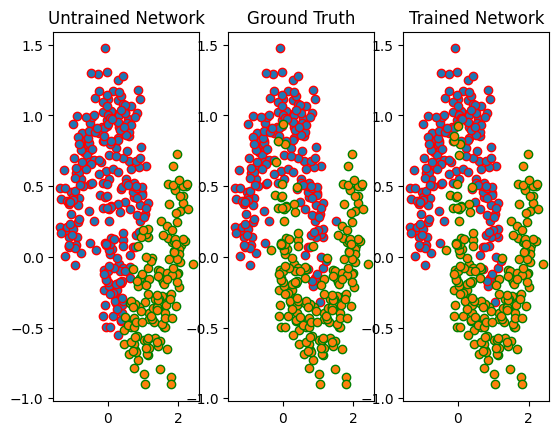

In [217]:
plt.subplot(1,3,1)
plt.scatter(X[classes==0,0],X[classes==0,1],edgecolors='r')
plt.scatter(X[classes==1,0],X[classes==1,1],edgecolors='g')
plt.title('Untrained Network')
plt.subplot(1,3,2)
plt.scatter(X[y==0,0],X[y==0,1],edgecolors='r')
plt.scatter(X[y==1,0],X[y==1,1],edgecolors='g')
plt.title('Ground Truth')
plt.subplot(1,3,3)
plt.scatter(X[pred_classes==0,0],X[pred_classes==0,1],edgecolors='r')
plt.scatter(X[pred_classes==1,0],X[pred_classes==1,1],edgecolors='g')
plt.title('Trained Network')

In [223]:
W1 = cls.coefs_[0]
W2 = cls.coefs_[1]
W3 = cls.coefs_[2]
b1 = cls.intercepts_[0]
b2 = cls.intercepts_[1]
b3 = cls.intercepts_[2]

probs = feed_forward(X, W1, W2, W3, b1, b2 ,b3)
classes = np.zeros(probs.shape[0], dtype=int)
classes[probs[:,1]>=0.5] = 1

plt.scatter(X[classes==0,0],X[classes==0,1],edgecolors='r')
plt.scatter(X[classes==1,0],X[classes==1,1],edgecolors='g')

IndexError: index 1 is out of bounds for axis 1 with size 1

In [219]:
probs

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [205]:
W1

array([[ 18.68745713, -39.47506227,   3.8868324 , -47.09988124,
         32.3596125 ,  14.30710979],
       [-15.3251783 ,  -6.79348198, -12.14684051,  25.92126243,
         25.29391629,  34.08558123]])

In [224]:
W3

array([[ 29.84218248],
       [ 32.41849093],
       [ 32.14458924],
       [-45.2490762 ],
       [-23.24515053],
       [ 55.47495224]])